In [1]:
!nvidia-smi

Tue Dec  5 15:06:16 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [27]:
# diable warnigns
import warnings
warnings.filterwarnings('ignore')

# import required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [28]:
# Import the data

# Training data
X_train = np.loadtxt('/content/drive/MyDrive/Datasets/Input/Image_Data/input.csv', delimiter = ',')
Y_train = np.loadtxt('/content/drive/MyDrive/Datasets/Input/Image_Data/labels.csv', delimiter = ',')

# Testing data
X_test = np.loadtxt('/content/drive/MyDrive/Datasets/Input/Image_Data/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('/content/drive/MyDrive/Datasets/Input/Image_Data/labels_test.csv', delimiter = ',')

In [29]:
# Dimension of the data
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2000, 30000)
(2000,)
(400, 30000)
(400,)


In [30]:
# size per image = 100px x 100px
# color image = RBG (3 layers)

print(100*100*3)

30000


In [31]:
# first array value from the file
print('First image array values:', X_train[0, :])

# Finding if the the input is colored image or not
print('Minimum pixel size:', min(X_train[1, :]))
print('Maximum pixel size:', max(X_train[1, :]))

# NOTE
    # If the pixel range is between 0-1 it is grey scale image
    # If the pixel range is between 0-255 it is colored image

First image array values: [37. 39. 25. ... 58. 54. 29.]
Minimum pixel size: 0.0
Maximum pixel size: 255.0


In [32]:
# Reshape the training data
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)
# Reshape the testing data
X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

# Scale the data
X_train = X_train/255.0
X_test = X_test/255.0

# Dimension of the data after scaling
print('Dimensions after scaling the data:')
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

Dimensions after scaling the data:
(2000, 100, 100, 3)
(2000, 1)
(400, 100, 100, 3)
(400, 1)


In [38]:
# first image pixel
print('First image array values:\n\n', X_train[0, :])

First image array values:

 [[[0.14509804 0.15294118 0.09803922]
  [0.10196078 0.09411765 0.03529412]
  [0.13333333 0.09803922 0.03921569]
  ...
  [0.22352941 0.17254902 0.1372549 ]
  [0.23921569 0.18431373 0.14901961]
  [0.25490196 0.2        0.16470588]]

 [[0.17647059 0.16862745 0.10980392]
  [0.10980392 0.09803922 0.03137255]
  [0.20392157 0.15686275 0.09411765]
  ...
  [0.21176471 0.16078431 0.1254902 ]
  [0.22352941 0.16862745 0.13333333]
  [0.23921569 0.18431373 0.14901961]]

 [[0.20392157 0.17647059 0.10196078]
  [0.1254902  0.09411765 0.01960784]
  [0.27058824 0.21176471 0.1372549 ]
  ...
  [0.21176471 0.15686275 0.11372549]
  [0.21960784 0.16470588 0.12156863]
  [0.23137255 0.17647059 0.13333333]]

 ...

 [[0.07843137 0.15294118 0.        ]
  [0.39607843 0.49019608 0.2627451 ]
  [0.59607843 0.71372549 0.47058824]
  ...
  [0.18039216 0.16078431 0.0745098 ]
  [0.23529412 0.21568627 0.12941176]
  [0.23529412 0.21568627 0.12941176]]

 [[0.18039216 0.25490196 0.03529412]
  [0.4549

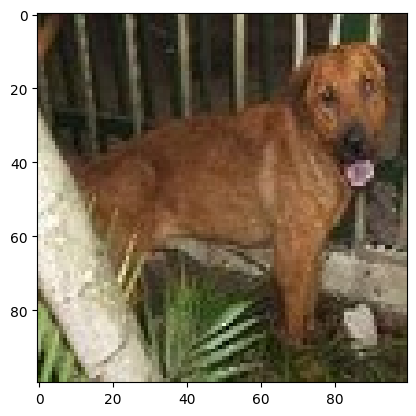

In [41]:
# printing the first image
plt.imshow(X_train[0, :])
plt.show()

In [ ]:
# --- DONT RUN THIS CELL --- #

# Traditional way of building the network
# Model building

# model = Sequential()

# # first layer
# model.add(Conv2D(32, (3,3), activation='relu', input_shape = (100, 100, 3)))  # 32 - no.of.filters, (3,3) - each filter size
# model.add(MaxPooling2D((2,2)))

# # second layer
# model.add(Conv2D(32, (3,3), activation='relu'))
# model.add(MaxPooling2D((2,2)))

# # Flattening layer
# model.add(Flatten())

# # Fully connected layer
# # first dense layer
# model.add(Dense(70, activation='relu'))  # 70 -no.of.neurons

# # final output layer
# model.add(Dense(1, activation='sigmoid'))

In [42]:
# Conventional way

model = Sequential([
    # First convolutional layer
    Conv2D(32, (3,3), activation='relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),

    # Second convolutional layer
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    # flattening layer
    Flatten(),

    # First dense layer
    Dense(70, activation='relu'),

    # Output layer
    Dense(1, activation='sigmoid')
])

In [43]:
# Model compilation
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [46]:
# training the model
model.fit(X_train, Y_train, epochs = 15, batch_size = 65)

Epoch 1/5
31/31 [==============================] - 1s 21ms/step - loss: 0.2207 - accuracy: 0.9130
Epoch 2/5
31/31 [==============================] - 1s 19ms/step - loss: 0.1681 - accuracy: 0.9420
Epoch 3/5
31/31 [==============================] - 1s 18ms/step - loss: 0.1068 - accuracy: 0.9695
Epoch 4/5
31/31 [==============================] - 1s 17ms/step - loss: 0.0767 - accuracy: 0.9820
Epoch 5/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0645 - accuracy: 0.9855


In [47]:
# evaluating the model
model.evaluate(X_test, Y_test)

13/13 [==============================] - 0s 14ms/step - loss: 1.1312 - accuracy: 0.6650


[1.1312252283096313, 0.6650000214576721]

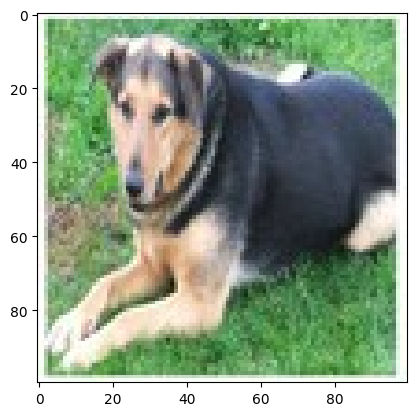

1/1 [==============================] - 0s 42ms/step
The model has predicted the image as : dog


In [89]:
# Predictions
import random
rdm_img = random.randint(0, len(Y_test))
plt.imshow(X_test[rdm_img, :])
plt.show()

# predict for the given image
y_pred = model.predict(X_test[rdm_img, :].reshape(1, 100, 100, 3))
# print(y_pred)
y_pred = y_pred > 0.1
# print(y_pred)

# output
if (y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print('The model has predicted the image as :', pred)